# Setup

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Data Preprocessing

# Load Data

In [76]:
trn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_train.csv', sep = ',')
tst_df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_test.csv', sep = ',')

In [132]:
trn_df.head()

,patient,x,y,z,heartRate,timestamp,tsDate
0,1502,23,569,878,70,1568073600000,2019-09-10 00:00:00.003
1,1502,23,571,878,70,1568073601000,2019-09-10 00:00:01.014
2,1502,23,570,878,70,1568073602000,2019-09-10 00:00:02.025
3,1502,23,570,878,70,1568073603000,2019-09-10 00:00:03.035
4,1502,23,570,878,70,1568073604000,2019-09-10 00:00:04.046


In [133]:
tst_df.head()

,patient,timestamp,tsDate,x,y,z,heartRate
0,1004,1567224000000,2019-08-31 04:00:00.004,-24,749,-626,77
1,1004,1567224010000,2019-08-31 04:00:10.022,-206,930,-63,77
2,1004,1567224020000,2019-08-31 04:00:20.041,-139,763,-577,72
3,1004,1567224030000,2019-08-31 04:00:30.059,-503,441,-557,73
4,1004,1567224040000,2019-08-31 04:00:40.060,-278,705,-396,78


## Inspect and cleanup

In [77]:
trn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.020357e+01,2.097376e+01,-1.000000e+00,6.100000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


In [78]:
bad_hr = trn_df['heartRate'] == -1
trn_df['heartRate'][bad_hr] = np.median(trn_df['heartRate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
trn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.314050e+01,1.488472e+01,3.400000e+01,6.300000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


In [80]:
trn_df.isna().sum()

patient      0
x            0
y            0
z            0
heartRate    0
timestamp    0
tsDate       0
dtype: int64

## Feature engineering

In [81]:
train_df = trn_df[['x', 'y', 'z', 'heartRate']]

In [82]:
train_df = train_df[slice(0, len(trn_df), 10)]

In [83]:
train_df = train_df.reset_index(drop=True)

## Split the data

In [84]:
n = len(train_df)

train_data = train_df[           : int(n*0.8)].to_numpy()
valid_data = train_df[int(n*0.8) :           ].to_numpy()
test_data  = tst_df[['x', 'y', 'z', 'heartRate']].to_numpy()

In [85]:
train_data.shape, valid_data.shape, test_data.shape

((75482, 4), (18871, 4), (722787, 4))

## Min Max scale

In [86]:
scaler = MinMaxScaler()

train = scaler.fit_transform(train_data.reshape(-1, 1))
valid = scaler.transform(valid_data.reshape(-1, 1))
test = scaler.transform(test_data.reshape(-1, 1))

In [87]:
train.shape, valid.shape, test.shape

((301928, 1), (75484, 1), (2891148, 1))

In [88]:
train = train.reshape((train_data.shape[0], 1, 4))
valid = valid.reshape((valid_data.shape[0], 1, 4))
test  = test.reshape((test_data.shape[0], 1, 4))

In [89]:
train.shape, valid.shape, test.shape

((75482, 1, 4), (18871, 1, 4), (722787, 1, 4))

# Model Data

## Autoencoder

In [21]:
encoder_inputs = tf.keras.layers.Input(shape=(1, 4))

encoder_l1 = tf.keras.layers.LSTM(16, return_state=True, activation='tanh')
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(1)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(16, return_sequences=True, activation='tanh')(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4))(decoder_l1)

autoencoder = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1, 4)]       0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 16),         1344        ['input_3[0][0]']                
                                 (None, 16),                                                      
                                 (None, 16)]                                                      
                                                                                                  
 repeat_vector_2 (RepeatVector)  (None, 1, 16)       0           ['lstm_4[0][0]']                 
                                                                                            

In [22]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

autoencoder.compile(loss = 'mae', optimizer='adam')
history = autoencoder.fit(train, train, epochs=60, validation_data=(valid, valid), verbose=1, batch_size=32, shuffle=False, callbacks=[reduce_lr])

Epoch 1/60
2359/2359 [==============================] - 14s 4ms/step - loss: 0.0395 - val_loss: 0.0092 - lr: 0.0010
Epoch 2/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0042 - val_loss: 0.0070 - lr: 9.0000e-04
Epoch 3/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0028 - val_loss: 0.0041 - lr: 8.1000e-04
Epoch 4/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0024 - val_loss: 0.0025 - lr: 7.2900e-04
Epoch 5/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0021 - val_loss: 0.0027 - lr: 6.5610e-04
Epoch 6/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0019 - val_loss: 0.0018 - lr: 5.9049e-04
Epoch 7/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0019 - val_loss: 0.0019 - lr: 5.3144e-04
Epoch 8/60
2359/2359 [==============================] - 10s 4ms/step - loss: 0.0017 - val_loss: 0.0028 - lr: 4.7830e-04
Epoch 9/60
2359/2359 [======================

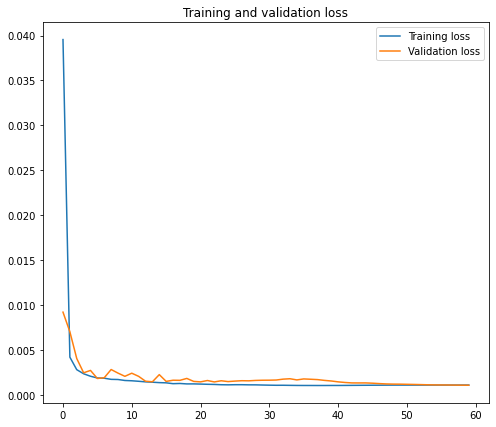

In [49]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(len(loss)) 

plt.figure(figsize=(8,7))
plt.plot(epochs, loss, label='Training loss') 
plt.plot(epochs, val_loss, label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Detect Anomaly

In [90]:
pred = autoencoder.predict(train)

In [91]:
train.shape, pred.shape

((75482, 1, 4), (75482, 1, 4))

In [92]:
train = train.reshape((train.shape[0], 4))
pred = pred.reshape((pred.shape[0], 4))

In [93]:
train.shape, pred.shape

((75482, 4), (75482, 4))

In [94]:
train_loss = tf.keras.losses.mae(train, pred)

In [95]:
train_loss.shape

TensorShape([75482])

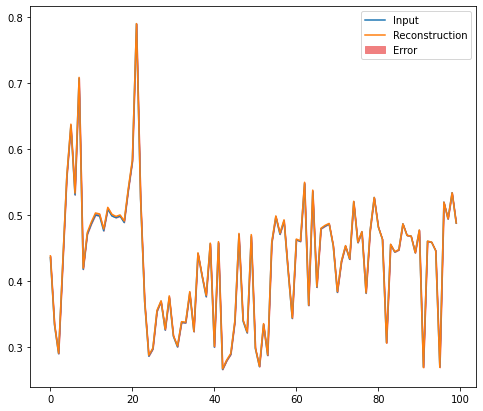

In [96]:
plt.figure(figsize=(8,7))
plt.plot(train[40000:40100, 0])
plt.plot(pred[40000:40100, 0])
plt.fill_between(np.arange(100), pred[40000:40100, 0], train[40000:40100, 0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


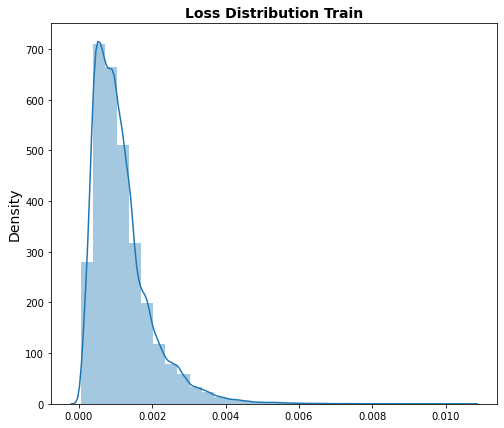

In [97]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution Train', size=14, fontweight="bold")
plt.ylabel('Density', size=14)
sns.distplot(train_loss, bins = 32, kde= True)

In [117]:
# threshold = np.mean(train_loss) + np.std(train_loss)
threshold = 0.003
print("Threshold: ", threshold)

Threshold:  0.003


In [99]:
pred_test = autoencoder.predict(test)

In [100]:
test.shape, pred_test.shape

((722787, 1, 4), (722787, 1, 4))

In [101]:
test = test.reshape((test.shape[0], 4))
pred_test = pred_test.reshape((pred_test.shape[0], 4))

In [102]:
test.shape, pred_test.shape

((722787, 4), (722787, 4))

In [103]:
test_loss = tf.keras.losses.mae(pred_test, test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


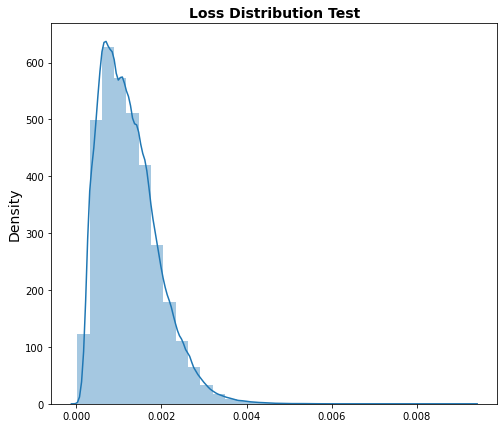

In [104]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution Test', size=14, fontweight="bold")
plt.ylabel('Density', size=14)
sns.distplot(test_loss, bins = 32, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


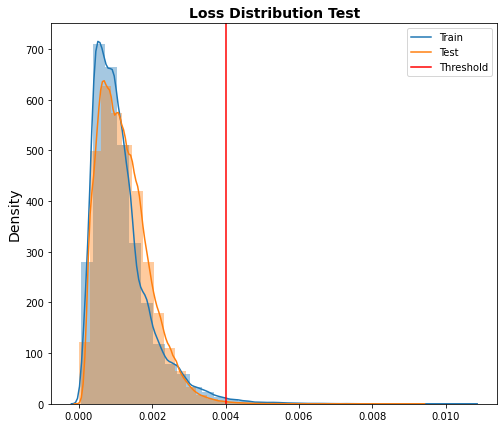

In [105]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution Test', size=14, fontweight="bold")
plt.ylabel('Density', size=14)
sns.distplot(train_loss, bins = 32, kde= True)
sns.distplot(test_loss, bins = 32, kde= True)
plt.axvline(x=threshold, color='r')
plt.legend(labels=["Train", "Test", "Threshold"])

In [107]:
tst_df.patient.unique()

array([1004, 1006, 3001, 3006, 4002])

In [108]:
len(tst_df[tst_df.patient == 1004])

144911

In [145]:
x = test_loss[slice(1000, 3000, 6)]
t = pd.to_datetime(tst_df['tsDate'])
t = t[slice(1000, 3000, 6)]

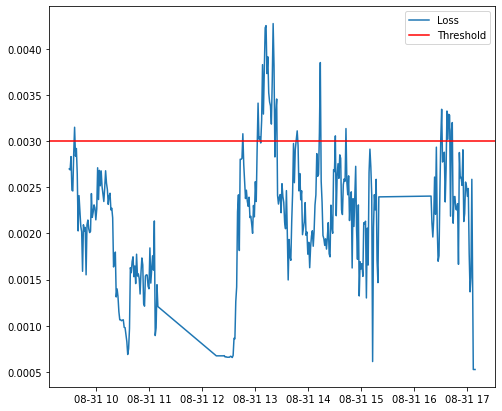

In [146]:
plt.figure(figsize=(8,7))
plt.plot(t, x)

plt.axhline(y=threshold, color='r')

plt.legend(labels=["Loss", "Threshold"])
plt.show()

In [147]:
anomaly = tf.math.less(test_loss, threshold)